# EEG analysis

In [1]:
#!pip install mne_qt_browser pyqt5 bsl pylsl liesl

In [2]:
import os
import time
import mne
import numpy as np
import pandas as pd

import bsl
from bsl import StreamPlayer, datasets
from bsl.externals import pylsl  # distributed version of pylsl
from bsl.triggers import TriggerDef

import liesl
import pylsl

import math
import matplotlib
import matplotlib.pyplot as plt

# %matplotlib qt
# mne.set_config('MNE_BROWSER_BACKEND', 'qt')

## Read the eeg CSV

In [3]:
idun_guardian_client_beta_folder = os.getcwd()
csv_filename = 'eeg_open_close_10s/eeg_close_1'

In [4]:
df = pd.read_csv(f'{idun_guardian_client_beta_folder}/data/{csv_filename}.csv')

## Convert it into MNE raw format

In [5]:
info = mne.create_info(sfreq=250, ch_names=['E1'], ch_types=['eeg'])
data = np.array([df['ch1'].values])
raw = mne.io.RawArray(data=data, info=info)
raw.filter(1,30)
# raw.notch_filter(50)
filtered_df = raw.to_data_frame()
filtered_df

In [7]:
# raw.save(f'{idun_guardian_client_beta_folder}/{csv_filename}.fif', overwrite=True)

## Plot the EEG signal

Text(0, 0.5, 'Signal')

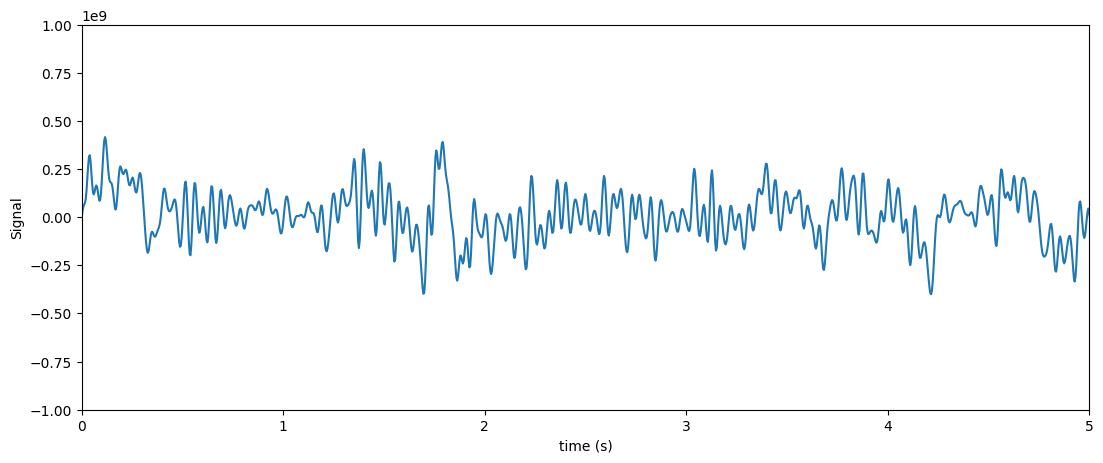

In [8]:
plt.figure(figsize=(13,5))
# timestamps_data = np.arange(start=0, stop=len(df['ch1'].tolist()), step = 1)/250
plt.plot(filtered_df['time'], filtered_df['E1'])
plt.xlabel('time (s)')
plt.xlim(0,5)
plt.ylim(-1e9,1e9)
plt.ylabel('Signal')

In [9]:
raw.plot(scalings='auto')

In [11]:
print(f"Length of the array in timepoint : {len(df['ch1'].tolist())} points")
print(f"Length of the array in seconds : {len(df['ch1'].tolist())/250 :.2f}s")

Length of the array in timepoint : 2000 points
Length of the array in seconds : 8.00s


## Plot the EEG frequencies of the whole signal

D:\Python\anaconda3\envs\idun_env\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


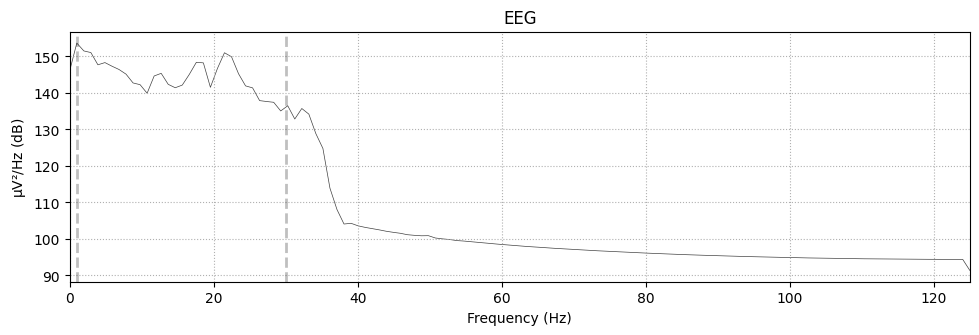

In [12]:
raw.plot_psd(picks='E1')

## Alpha waves analysis

In [13]:
psds_alpha, freqs_alpha = mne.time_frequency.psd_welch(raw, fmin=8, fmax=12, picks='E1')
print(f'Mean power spectral density of alpha waves : {psds_alpha.mean()}')

Mean power spectral density of alpha waves : 186.44342213807266


<decorator-gen-201>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.


In [14]:
for index, freq in enumerate(freqs_alpha):
    print(f'Power spectral density of frequence {freq:.2f}Hz : {psds_alpha[0][index]}')

Power spectral density of frequence 8.79Hz : 187.78647285060407
Power spectral density of frequence 9.77Hz : 168.3818277440393
Power spectral density of frequence 10.74Hz : 98.06187148696883
Power spectral density of frequence 11.72Hz : 291.5435164706784


## Theta waves analysis

In [15]:
psds_theta, freqs_theta = mne.time_frequency.psd_welch(raw, fmin=3, fmax=8, picks='E1')
print(f'Mean power spectral density of theta waves : {psds_theta.mean()}')

Mean power spectral density of theta waves : 514.951394081105


In [16]:
for index, freq in enumerate(freqs_theta):
    print(f'Power spectral density of frequence {freq:.2f}Hz : {psds_theta[0][index]}')

Power spectral density of frequence 3.91Hz : 589.8099367709985
Power spectral density of frequence 4.88Hz : 678.3341040418848
Power spectral density of frequence 5.86Hz : 540.1409761786043
Power spectral density of frequence 6.84Hz : 439.13150894240505
Power spectral density of frequence 7.81Hz : 327.340444471632


# Ideas to develop from that

Frequencies which power will increase with the mindfullness state : Alpha, theta

Frequencies which power will decrease with the mindfullness state : gamma, beta (, delta)

# Timestamps

In [ ]:
df['timestamp'] = df['timestamp'] - df['timestamp'].iloc[0]

In [ ]:
plt.plot(df['timestamp'])